# TASK 1 

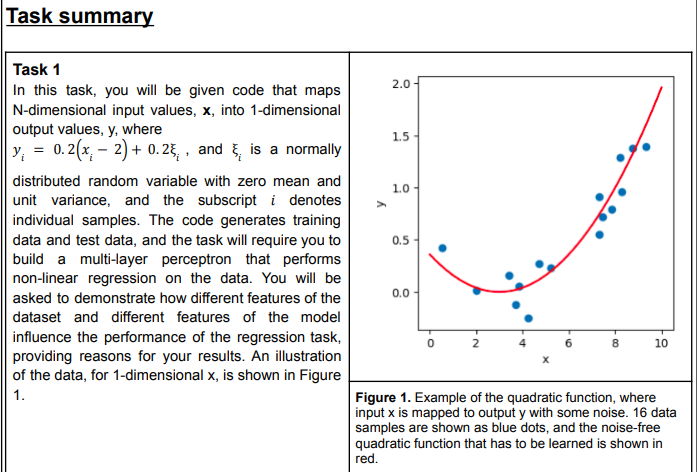

## Subtask 1A - 5 marks <ignore>
Using Pytorch, create a class that defines a multi-layer perceptron (MLP). The MLP must:
* take inputs that are either 1-dimensional or 2-dimensional
* have three hidden layers with 16 neurons in each layer, and a 1-dimensional output
* use ReLU non-linear activations for the hidden layers, and no nonlinearity for the output layer.

The class must include a forward pass function that takes an input, X, and returns an output, Y, where X is a MxN tensor (M samples, N input dimensions), and Y is a Mx1 tensor such that each sample produces a scalar output.

Use the code cell below to create your model. For each line of code, write a short comment to explain what the code does.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import Callable

# This MLP class is adapted from Lab 5's two-layer neural network implementation.
# The original version had 2 layers, 100 hidden units, and 3 output dimensions.
# I modified the code to meet the requirements of Assignment Subtask 1A

class MLP(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_size: int,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = F.relu):
        super().__init__()

        #Declare 3 hidden layer
        self.l1 = nn.Linear(input_size, hidden_layer_size)
        self.l2 = nn.Linear(hidden_layer_size, hidden_layer_size)
        self.l3 = nn.Linear(hidden_layer_size, hidden_layer_size)

        #Declare output
        self.out = nn.Linear(hidden_layer_size, output_size)

        #Declare activation function
        self.activation_fn = activation_fn

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:

        #Input to layer1
        x = self.l1(inputs)
        x = self.activation_fn(x)

        #Layer1 to Layer2
        x = self.l2(x)
        x = self.activation_fn(x)

       #Layer2 to Layer3
        x = self.l3(x)
        x = self.activation_fn(x)

       #Layer3 to Output
        x = self.out(x)
        return x

#Instantiate the MLP class
feature_count = 1
hidden_layer_size = 16
class_count = 1

#Construct the model
model = MLP(feature_count, hidden_layer_size, class_count)


## Subtask 1B
Provide three reasons why the ReLU nonlinearity might be a better choice than a Sigmoid nonlinearity for a regression task.

Firstly,  ReLu help avoid the vanishing gradient problem due to its simple activation rule whih is either 0 or the input value. This allows gradients to remain strong in the backpropagation and helps to prevent them to becoming too small

Secondly, it is computationally cheaper than the sigmoid function because of it simple operation. This makes Relu more efficient and faster to train, especially when working with large models or big data

Lastly, ReLu outputs zero for all negative input, making some of the neurons become inactive for a given sample. With this approach, the model less likely to overfit the training data and it generalise better to unseen data.

## Subtask 1C
Data for Task 1 is to be generate using the following equation:
$$
y_i = 0.2\left(x_i - 3\right)^2 + 0.2\xi_i
$$
where <lt>$i$ denotes the sample and <lt>$\xi$ is a random variable drawn from a normal distribution with zero mean and unit variance. What is a suitable loss function to perform regression on pairs of (x,y) samples generated by this function? Why?

L2 loss or MSE is the suitable loss function for this regression taks. this loss function is appropriate for regression tasks where the output include random noises, such as Gaussian noise in this case. This function also works well with backpropagation since it penalises larger errors more strongly which helps the model learn to prioritise accuracy and give the model more smooth gradient.

## Subtask 1D
Name two gradient descent optimisers that were discussed in the lectures, and that might be used for this regression task. Describe an advantage and a disadvantage for using each, providing reasons.

The first gradient descent optimisers will be SGD. It's an efficient method for generalizes a large datasets. The Straight forward behaviour makes the model more robust especially when combine with a momentum. However, SGD  typically converges slowly due to particular complex and noisy losss. Not only that, the optimiser rely heavily on learning rate. If not carefully tuned, it can lead to instability and become a drawback for a module.

The second gradient descent optimisers will be Adam because of the ability  of adjusting the learning rate for each parameter, which leads to faster and more stable convergence. Generally it requires less manual tuning than SGD making this optimiser more easy to implement. The downside of adam that it can somtimes lead to poorer generalisation compared to SGD in simpler task. The optimiser could converge to sharp or suboptimal in the respect of the minima which impacting the model robustness.

## Subtask 1E
What is meant by the term "batch" when training a NN? What is the smallest and the largest possible batch sizes? What are the advantages of using small batch sizes? What are the advantages of using large batch sizes?

A batch refers to a subset of the training data used in each training iteration to calculate the gradients from the loss and also update it weights. Instead doing the backward and forward for the entire dataset at once, the data is divided into smaller chunck called batches.

The smallest possible batches would be 1 and the largest possible batches will be equals of the entire training dataset.

The Advantage of using small batches is that it introduces more noise into the gradient optimiser which can help the model into a better generalisation. However, it may result a slower convergence due to the noisy updates.

The Advantage of using large batches, that it provide more accurate gradient making the model have a faster and more stable convergence. The donwnfall of the large batches is that it require more memory and may lead to poorer generelisation as the model might overfit and converge to sharp minima.

## Subtask 1F
Using the model you built in 1A, and data generated by the code below, demonstrate how the size of the training dataset affects the amount of overfitting when the input data is 1-dimensional. Your evidence should come in the form of learning curves that show the loss as the dependent variable and training progress as the independent variable. These learning curves should appear similar to the ones you were shown in the lectures. You must use at least 5 different training dataset sizes to demonstrate the transition from strong overfitting to intermediate overfitting to no overfitting. For each dataset size, rerun the model using a different random seed at least 5 times. The learning curves you plot must show the mean loss, when averaged across reruns. The output of your code cell must include these figures, and the figures must be generated by code that is executed in the cell. You must not save figures and then import them.

**Note**: you may have to experiment with various different dataset sizes before you select the 5 or more sizes that effectively demonstrate strong, intermediate, and no overfitting. Choose these training dataset sizes wisely, as you will be required to compare results to a new scenario in subtask 1H.

In [ ]:
###
### Use this code to generate the data
###

# Funtion definition
def func(x,ndims):
    y = 0. # initialise y
    for i in range(ndims): # for each input dimension
        y += (0.2 * (x[:,i] - 3.0)) ** 2 # increment y value
    y += torch.randn(y.size()) * 0.2 # add normally distributed noise
    return y

# Define parameters and generate data
######################################################################
######################################################################
# PROVIDE VALUES FOR THESE VARIABLES ONLY.
# LEAVE ALL OTHER VARIABLES UNTOUCHED
ndims =
Ntrain =
Nbatch =
######################################################################
######################################################################
Ntest = 500
x_train = torch.rand(Ntrain, ndims)*10.0  # Inputs from 0 to 10
y_train = func(x_train, ndims) # generate noisey y training data
y_train = y_train.view(-1, 1) # reshape y data
x_test = torch.rand(Ntest, ndims)*10.0  # Inputs from 0 to 10
y_test = func(x_test, ndims) # generate noisey y test data
y_test = y_test.view(-1, 1) # reshape y data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
#I copy paste from the previous code shell and wrap it on a function for better implmentation without changing any important variable

# Funtion definition
def func(x,ndims):
    y = 0. # initialise y
    for i in range(ndims): # for each input dimension
        y += (0.2 * (x[:,i] - 3.0)) ** 2 # increment y value
    y += torch.randn(y.size()) * 0.2 # add normally distributed noise
    return y

def generate_data(data_sizes, data_input):
  # Define parameters and generate data
  ######################################################################
  ######################################################################
  # PROVIDE VALUES FOR THESE VARIABLES ONLY.
  # LEAVE ALL OTHER VARIABLES UNTOUCHED
  ndims = data_input
  Ntrain = data_sizes
  Nbatch = Ntrain
  ######################################################################
  ######################################################################
  Ntest = 500
  x_train = torch.rand(Ntrain, ndims)*10.0  # Inputs from 0 to 10
  y_train = func(x_train, ndims) # generate noisey y training data
  y_train = y_train.view(-1, 1) # reshape y data
  x_test = torch.rand(Ntest, ndims)*10.0  # Inputs from 0 to 10
  y_test = func(x_test, ndims).view(-1, 1) # generate noisey y

  return x_train, y_train, x_test, y_test


#Create another Function, that way, I can just called for each of the datasize.
#This function will take:
# Ntrain as parameter, number of epochs,
#Feature_count, hidden layer, output layer as MLP inizialisation from 1A
#repeat as Random Seed
#The output will be a graph showing the mean loss of training and testing data
def generate_graph(Ntrain, epochs=100, feature_count=1, hidden_layer_size=16, class_count=1, repeat=5):

  #Generate Test Data
  _, __, x_test, y_test = generate_data(Ntrain, feature_count)

  # For storing loss curves across different runs
  train_loss = []
  test_loss = []

  #Random Seed
  for seed in range(repeat):
      torch.manual_seed(seed)

      #Generate Training Data
      x_train, y_train, _, __ = generate_data(Ntrain, feature_count)

      #Declare MLP from 1a, L2 Loss function, SGD Optimizer
      model = MLP(feature_count, hidden_layer_size, class_count)
      criterion = nn.MSELoss()
      optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

      #Temporary variable to store loss curves after finishing every epochs
      train_curve = []
      test_curve = []

      for epoch in range(epochs):
          # Train
          model.train()
          optimizer.zero_grad()
          output = model(x_train)
          loss = criterion(output, y_train)
          loss.backward()
          optimizer.step()
          train_curve.append(loss.item())

          # Test
          model.eval()
          with torch.no_grad():
              test_output = model(x_test)
              test_loss_value = criterion(test_output, y_test)
              test_curve.append(test_loss_value.item())

      train_loss.append(train_curve)
      test_loss.append(test_curve)

  # Average over the 5 runs
  avg_train_loss = np.mean(train_loss, axis=0)
  avg_test_loss = np.mean(test_loss, axis=0)

  # Plot
  plt.figure(figsize=(12, 8))
  plt.plot(avg_train_loss, label="Training Loss", color='blue')
  plt.plot(avg_test_loss, label="Test Loss", color='red', linestyle='--')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title(f"Learning Curves for Ntrain = {Ntrain}")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


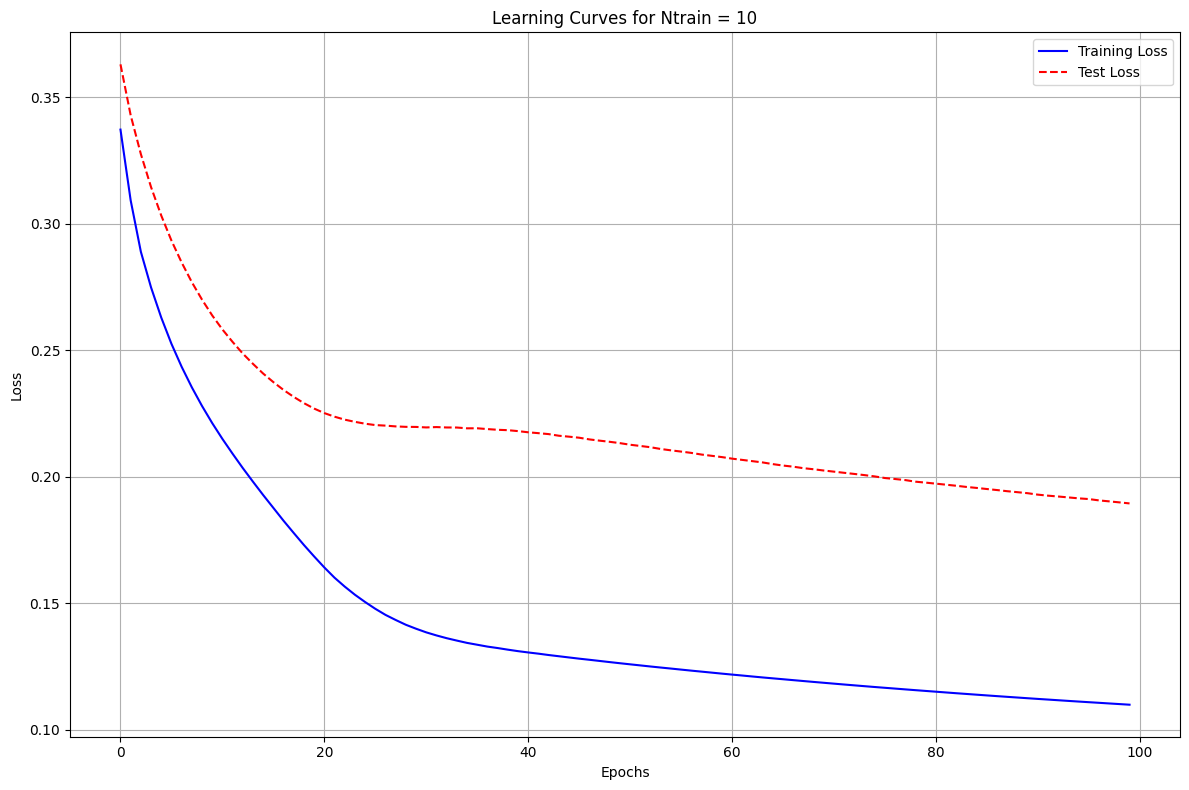

In [ ]:
generate_graph(10)

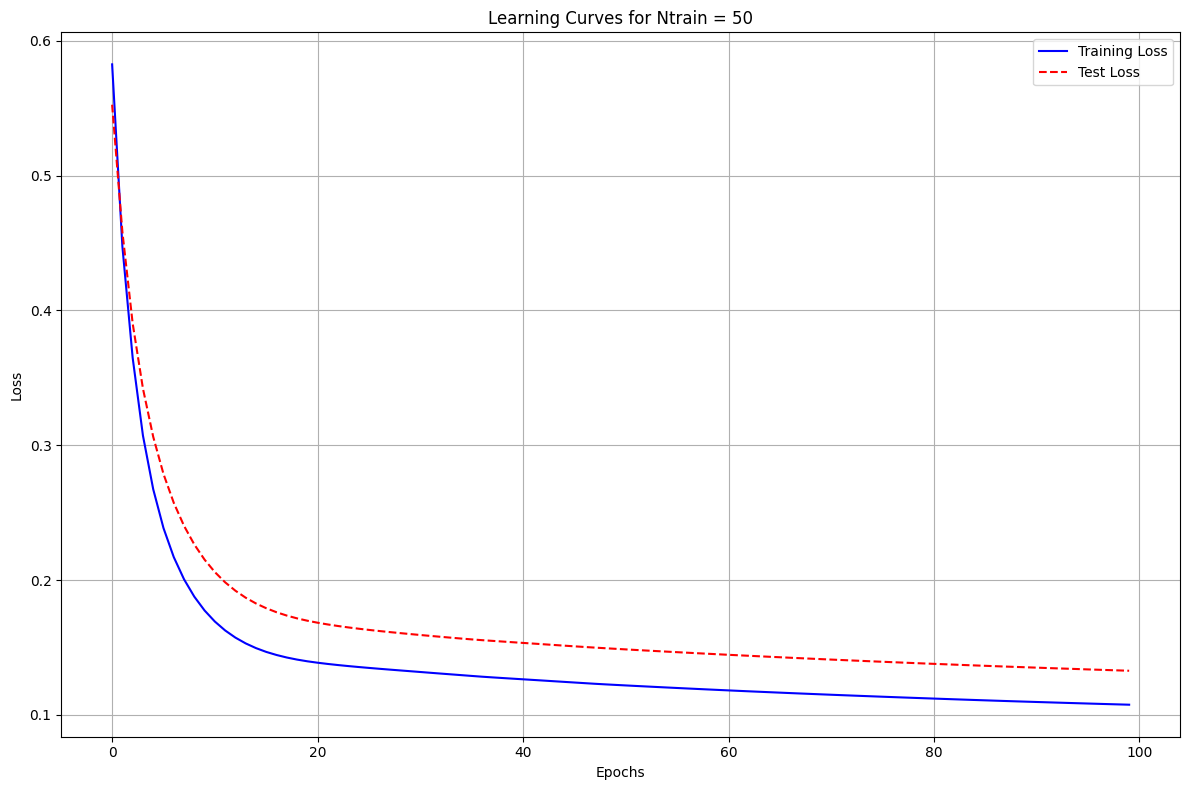

In [ ]:
generate_graph(50)

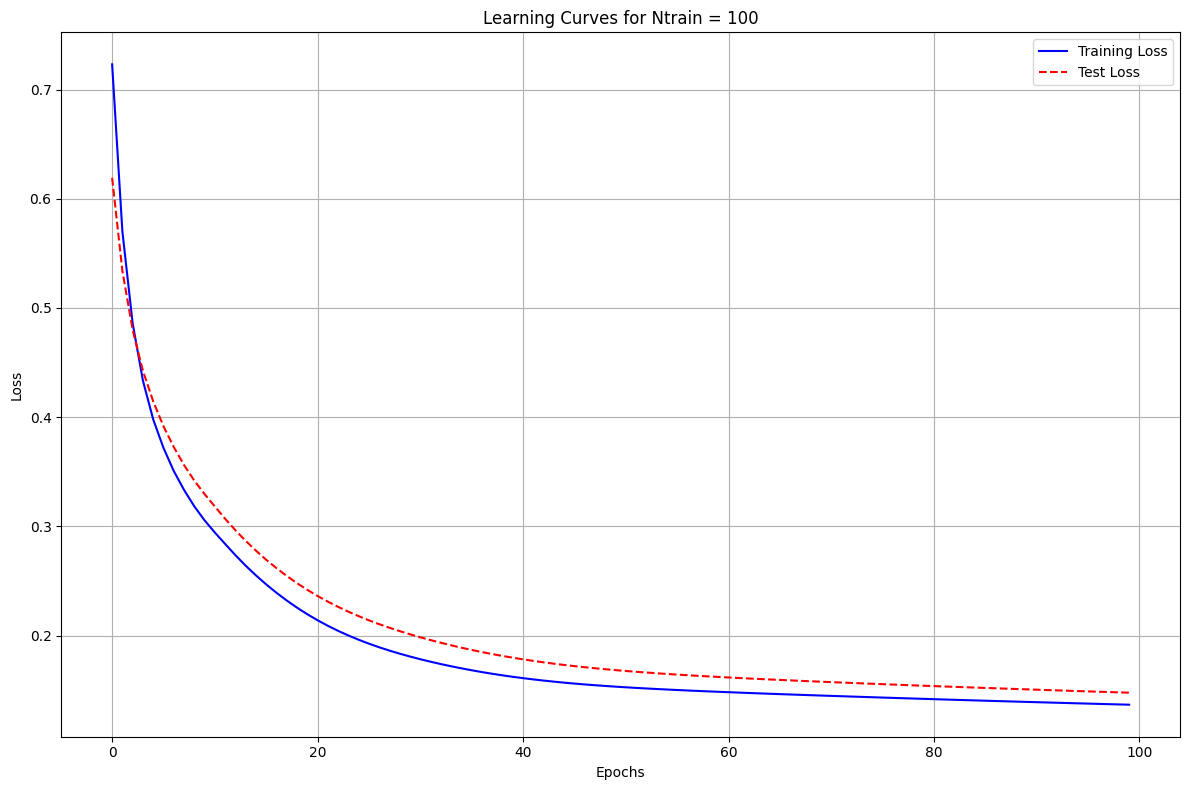

In [ ]:
generate_graph(100)

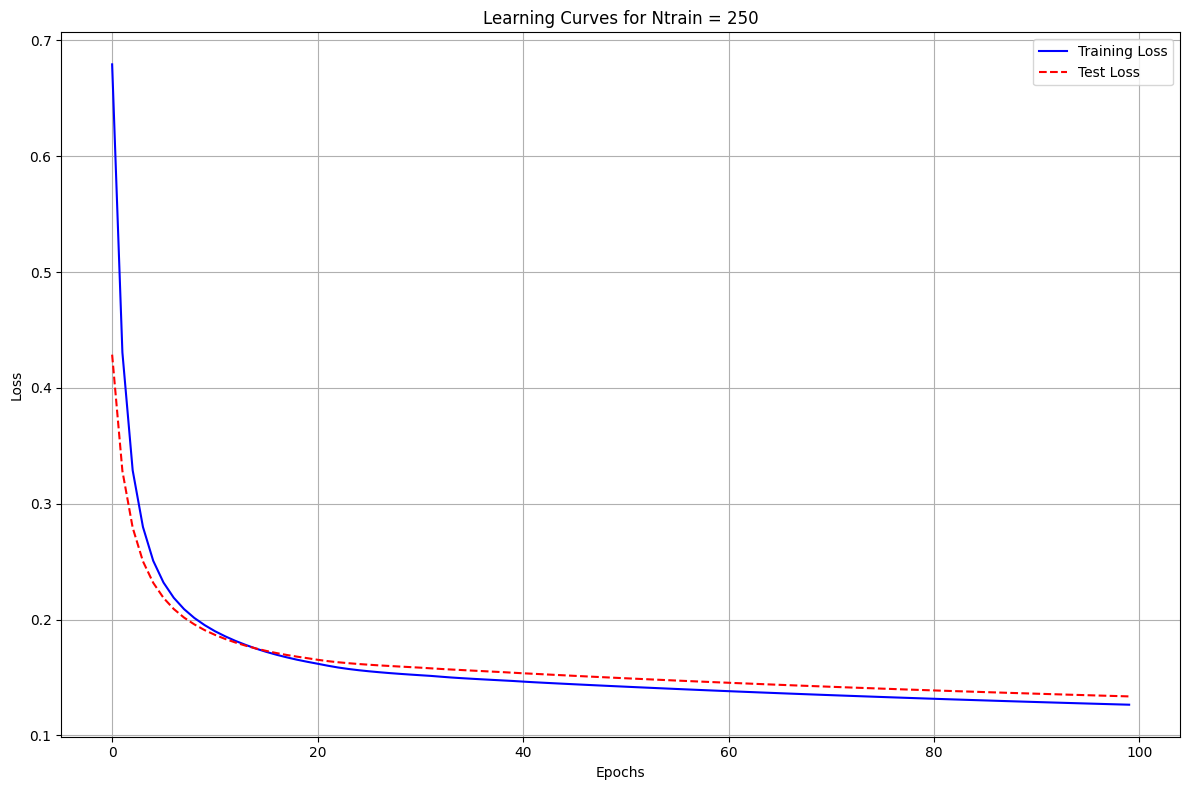

In [ ]:
generate_graph(250)

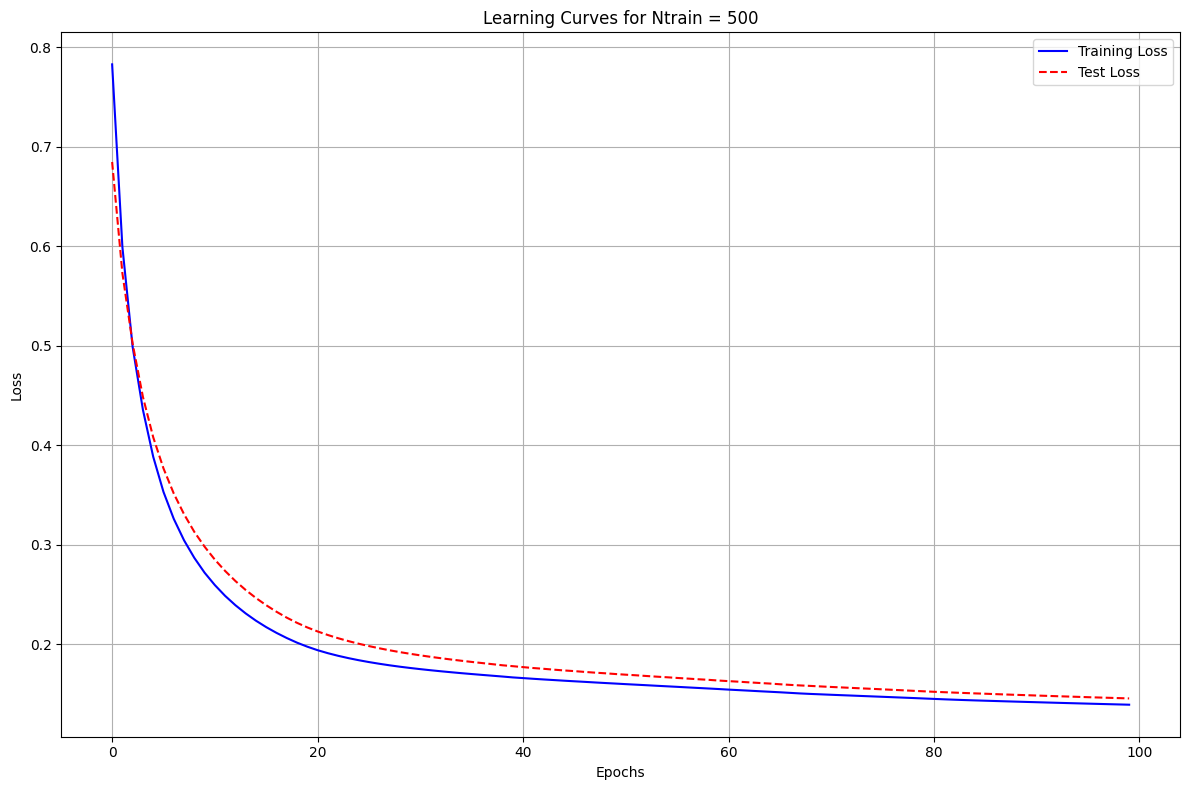

In [ ]:
generate_graph(500)

## Subtask 1G
Describe the results you present in 1F. In your description, include a statement of the smallest training dataset size at which overfitting is no longer seen. Also include an explanation about why you might expect there to be a gap between the training and test losses, even if the model is not overfitting.

The learning curve in 1F illusterate how training and test loss being affected by the data sizes. The training sizes varies from 10, 50, 100, 250 to 500. Even though the ideal train-test split is typically 80% and 20%, my model performed quite well, showing that even a small training size (Ntrain) was enough to produce effective results.

For this model, I tune the batches to be the same as the Ntrain(Full Batch) which making the graph having a very small gap between large datasets. However, the small gap can remain due to gaussian noise in the data or the test data doesn't perform backpropagation or update weights. Meaning it cannot adapt to any random noise in it.

When the training size is very small(Ntrain = 10), the model quickly minimize the training loss, however the test loss remain higher which suggesting an overfitting.

As the training size increases(Ntrain = 50 to 100) the gap between training and test loss narrows, and the overall test loss also decreases. This indicate thas that the model generalises better with more data.

for the larger datasets(Ntrain 50 to 100), both training and test losses converge even more smoothly and closely alligned. This shows even more improved generalisation and reduce the overfitting.

From 1F, we can summarize that increasing the training data size leads to better model performance in terms of loss convergence. As the dataset grows, both training and test losses decrease more smoothly and stay closely aligned, indicating improved generalization and reduced overfitting.

## Subtask 1H
Repeat subtask 1F, but for 2-dimensional inputs. Make sure that you use suitable dataset training sizes to demonstrate the transition from strong overfitting to intermediate overfitting to no overfitting. You must include the smallest dataset size at which no overfitting is seen in subtask 1F. Remember, you must produce figures, just as you did for subtask 1F.

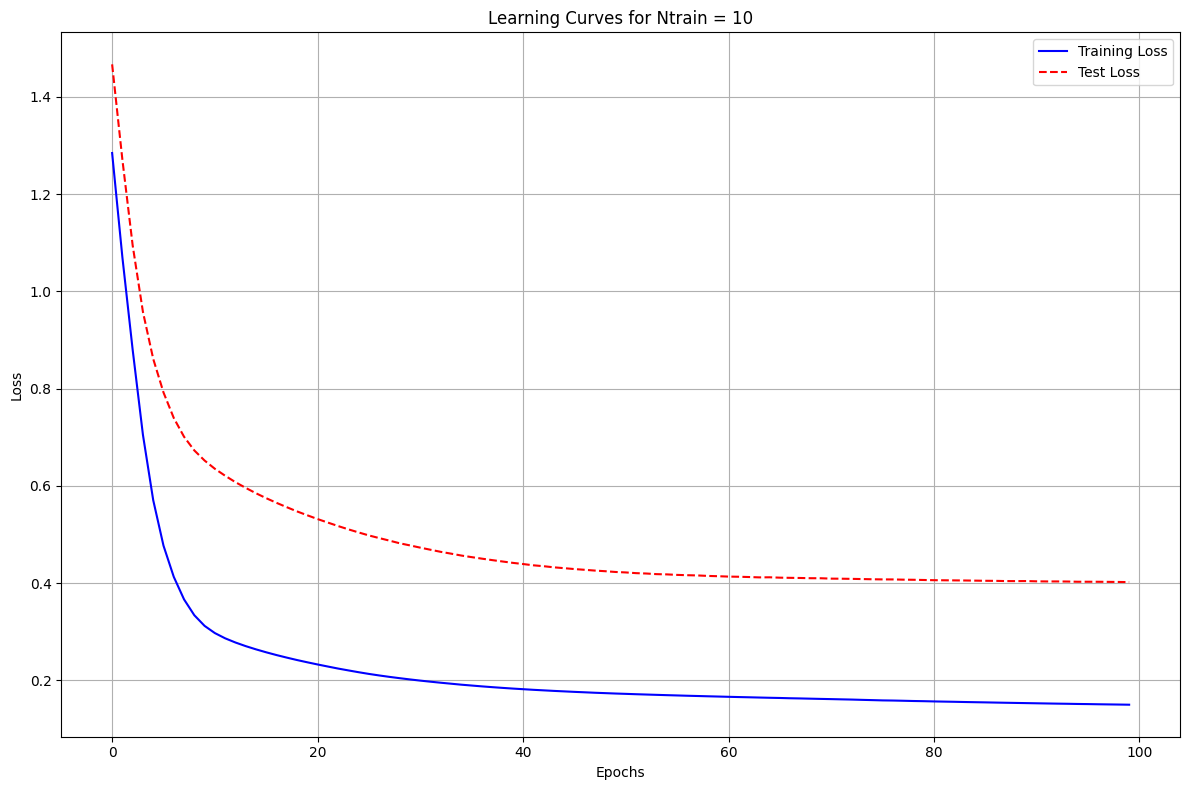

In [ ]:
generate_graph(10, feature_count=2)

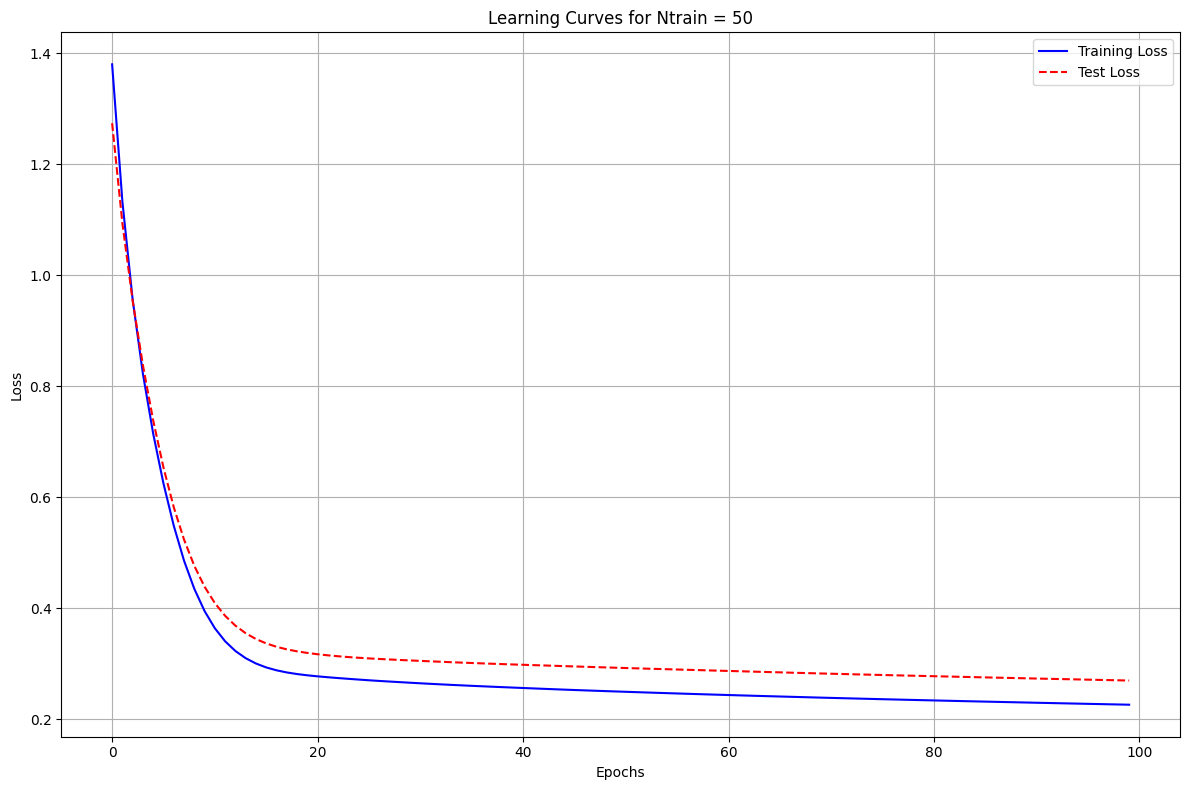

In [ ]:
generate_graph(50, feature_count=2)

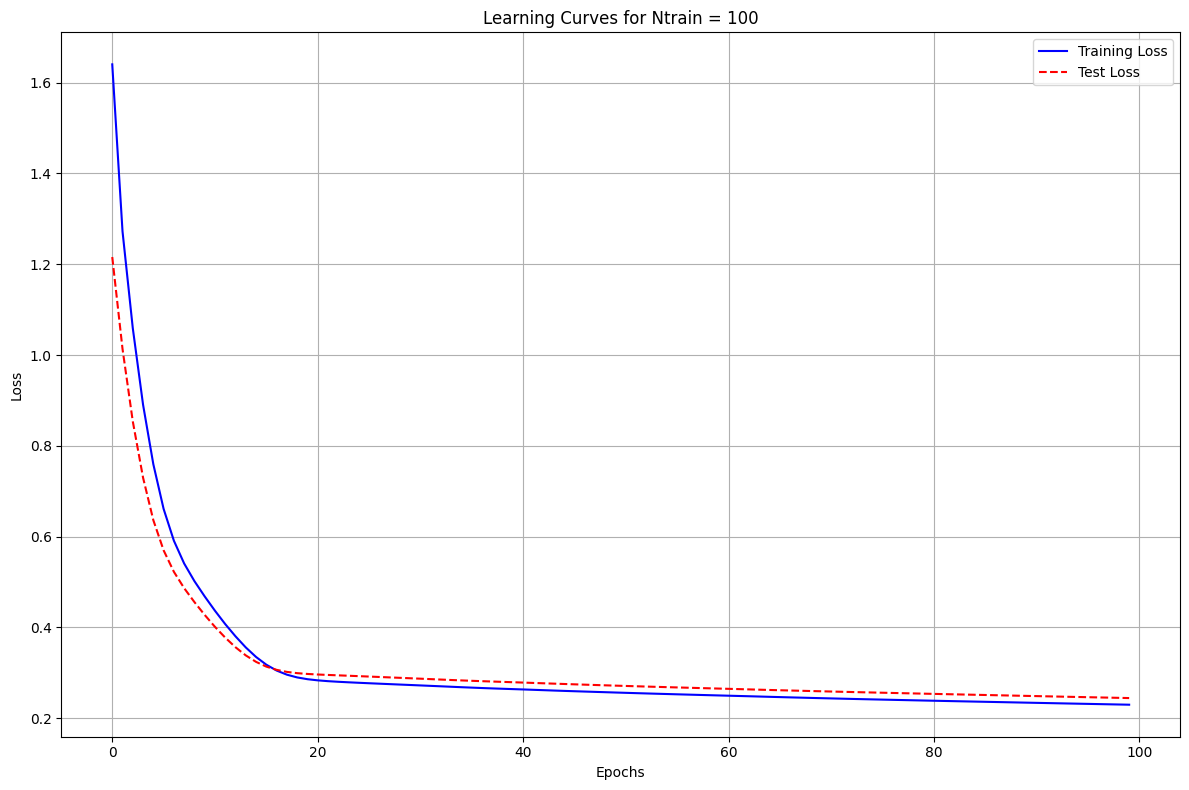

In [ ]:
generate_graph(100, feature_count=2)

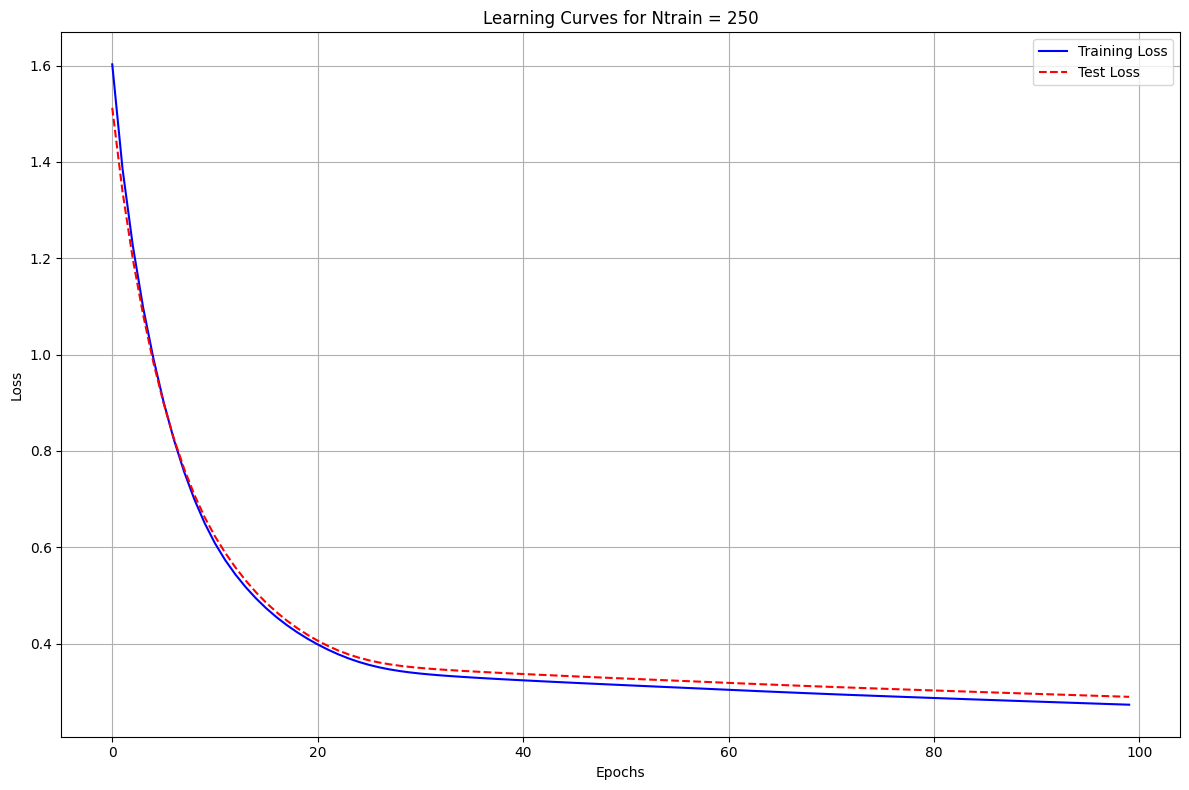

In [ ]:
generate_graph(250, feature_count=2)

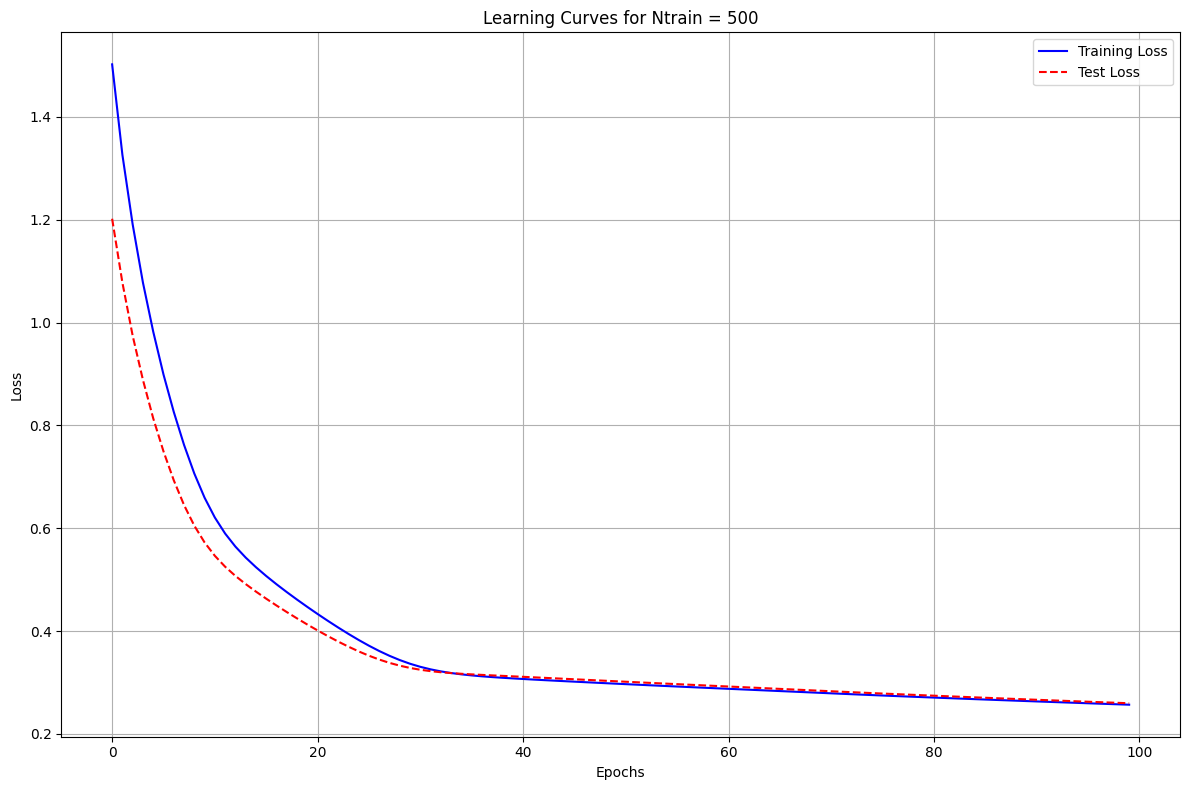

In [ ]:
generate_graph(500, feature_count=2)

## Subtask 1I
Explain how increasing the dimensionality of the inputs affects the degree of overfitting by the model. Give reasons. Backup your statements by explicitly referring to specific plots in the figures you presented above. In you explanation, state whether there is an increase / a decrease / no change in the smallest dataset size that produces no overfitting, when gong from 1-dimensional inputs to 2-dimensional inputs.

In general, using 2-dimensional inputs results in worse overfitting compared to 1-dimensional inputs, especially when the training dataset is small. This is because increasing the number of input dimensions makes the model more complex, allowing it to learn more parameters.As a result, the model performs well on the training set but poorly on unseen test data.

However, my model showed the opposite trend, the 2D input appeared to perform better than the 1D input at larger dataset sizes, with smoother convergence and lower final test loss. This may be due to the specific hyperparameter choices used in my implementation. I trained all models for 100 epochs, using L2 loss with SGD optimizer and a learning rate of 0.01. As a result, the 2D model may have generalized better simply because it was underfitting slightly, whereas the 1D model could still overfit noise more easily. Additionally, the 2D version of the quadratic function may have distributed noise more evenly across input features, making the learning task effectively easier under the fixed training setup.



## Subtask 1J
Dropout is one form of regularisation that can help to mitigate against overfitting. Explain how dropout is implemented, and how it acts as a regulariser. Explain what additional steps must be taken to ensure that the loss for training data can be fairly compared to the loss for test data? Name another method that helps to prevent overfitting, and any precautions that must be taken when using that method.

Dropout is a way to stop a neural network from overfitting by randomly turning off some of its neurons during training. That means in each round of training, the network becomes slightly different because some parts are ignored. This forces the model to not depend too much on any one neuron and encourages it to learn more general, flexible patterns. When we switch to testing, we use the full network again, but we need to make sure the outputs aren’t suddenly much larger than during training. To fix this, we scale the outputs so that the training and test losses can be compared fairly.

Another popular way to prevent overfitting is called weight decay or L2 regularisation. This works by slightly shrinking the model’s weights during training, which keeps it from becoming too complex. But if we set this too strong, the model might not learn properly and could underfit, meaning it performs badly on both training and test data.

## Subtask 1K
Replicate the model used in subtask 1A in the code cell below, adding dropout after each of the two hidden layers. Using the 2-dimensional input data, and a training dataset size that produced overfitting, investigate how the dropout probability affects overfitting and generalisability of the model. You must use at least 5 different dropout probabilities to demonstrate the transition from strong overfitting to intermediate overfitting to no overfitting. For each dropout probability, rerun the model using a different random seed at least 5 times. The learning curves you plot must show the mean loss, when averaged across reruns. The output of your code cell must include these figures, and the figures must be generated by code that is executed in the cell. You must not save figures and then import them.

**Note**: you may have to experiment with various dropout probabilities before you select the 5 or more probabilities that effectively demonstrate strong, intermediate, and no overfitting.

In [ ]:
# This MLP class is from subtask 1A
# I modified the code to meet the requirements of Assignment Subtask 1K

class MLP_Dropout(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_size: int,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = F.relu,
                 dropout_p: float = 0.5):
        super().__init__()

        #Declare 3 hidden layer
        self.l1 = nn.Linear(input_size, hidden_layer_size)
        self.l2 = nn.Linear(hidden_layer_size, hidden_layer_size)
        self.l3 = nn.Linear(hidden_layer_size, hidden_layer_size)

        #Declare 2 dropout layers
        self.d1 = nn.Dropout(dropout_p)
        self.d2 = nn.Dropout(dropout_p)

        #Declare output
        self.out = nn.Linear(hidden_layer_size, output_size)

        #Declare activation function
        self.activation_fn = activation_fn

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:

        #Input to layer1 to dropout1
        x = self.l1(inputs)
        x = self.activation_fn(x)
        x = self.d1(x)

        #Layer1 to Layer2 to dropout2
        x = self.l2(x)
        x = self.activation_fn(x)
        x = self.d2(x)

       #Layer2 to Layer3
        x = self.l3(x)
        x = self.activation_fn(x)

       #Layer3 to Output
        x = self.out(x)
        return x

#This Function is from the task 1F. I only modified the MLP class so it will take Dropout Probability from the function parameter.
def underfitting_graph(Ntrain, epochs=100, feature_count=1, hidden_layer_size=16, class_count=1, repeat=5, dropout_p=0.5):

  #Generate Test Data
  _, __, x_test, y_test = generate_data(Ntrain, feature_count)

  # For storing loss curves across different runs
  train_loss = []
  test_loss = []

  #Random Seed
  for seed in range(repeat):
      torch.manual_seed(seed)

      #Generate Training Data
      x_train, y_train, _, __ = generate_data(Ntrain, feature_count)

      #Declare MLP with Dropout, L2 Loss function, Adam Optimizer
      model = MLP_Dropout(feature_count, hidden_layer_size, class_count, dropout_p=dropout_p)
      criterion = nn.MSELoss()
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

      #Temporary variable to store loss curves after finishing every epochs
      train_curve = []
      test_curve = []

      for epoch in range(epochs):
          # Train
          model.train()
          optimizer.zero_grad()
          output = model(x_train)
          loss = criterion(output, y_train)
          loss.backward()
          optimizer.step()
          train_curve.append(loss.item())

          # Test
          model.eval()
          with torch.no_grad():
              test_output = model(x_test)
              test_loss_value = criterion(test_output, y_test)
              test_curve.append(test_loss_value.item())

      train_loss.append(train_curve)
      test_loss.append(test_curve)

  # Average over the 5 runs
  avg_train_loss = np.mean(train_loss, axis=0)
  avg_test_loss = np.mean(test_loss, axis=0)

  # Plot
  plt.figure(figsize=(12, 8))
  plt.plot(avg_train_loss, label="Training Loss", color='blue')
  plt.plot(avg_test_loss, label="Test Loss", color='red', linestyle='--')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title(f"Learning Curves for Ntrain = {Ntrain}")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()



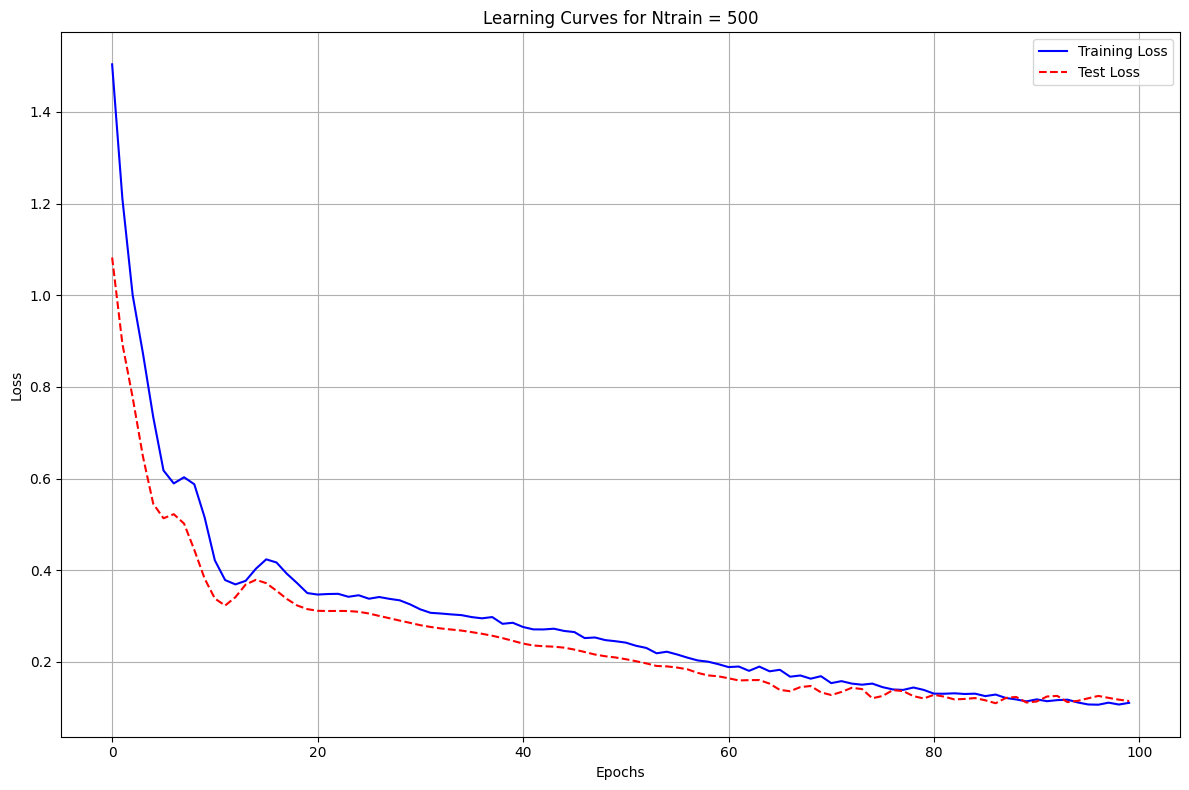

In [ ]:
underfitting_graph(500, feature_count=2, dropout_p=0.1)

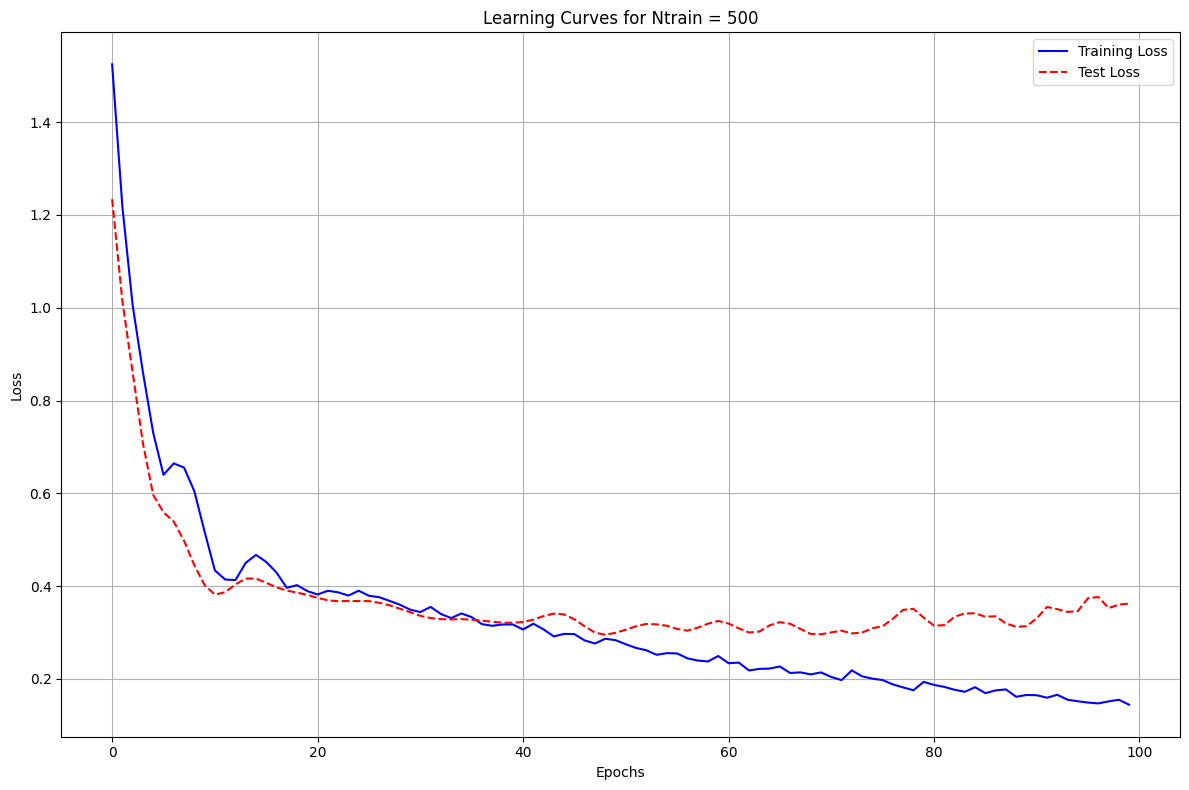

In [ ]:
underfitting_graph(500, feature_count=2, dropout_p=0.2)

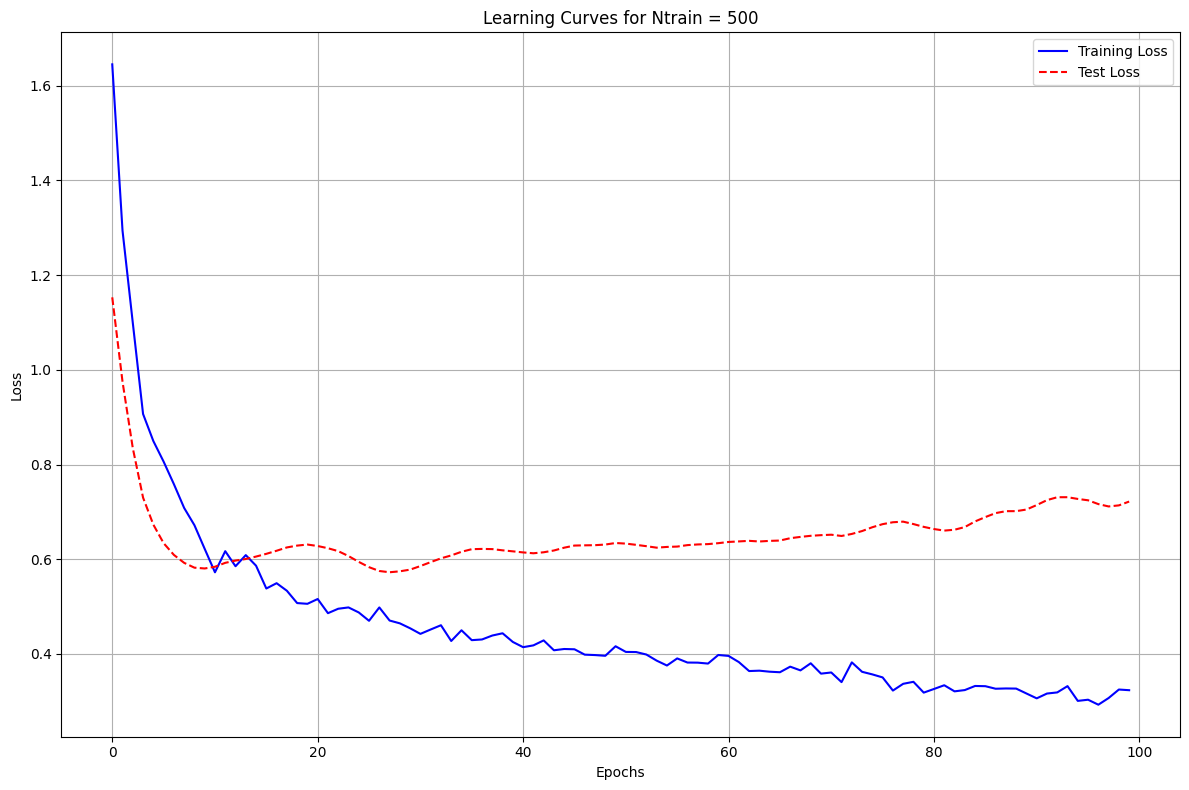

In [ ]:
underfitting_graph(500, feature_count=2, dropout_p=0.5)

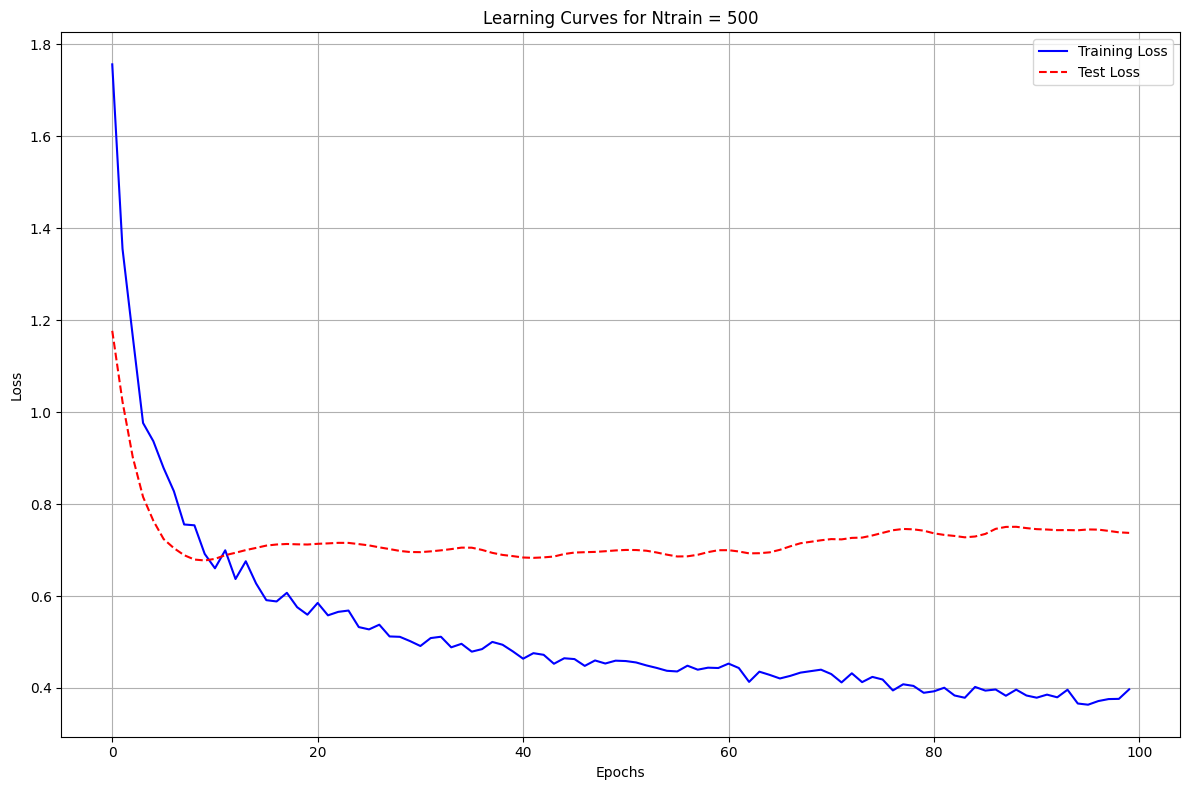

In [ ]:
underfitting_graph(500, feature_count=2, dropout_p=0.6)

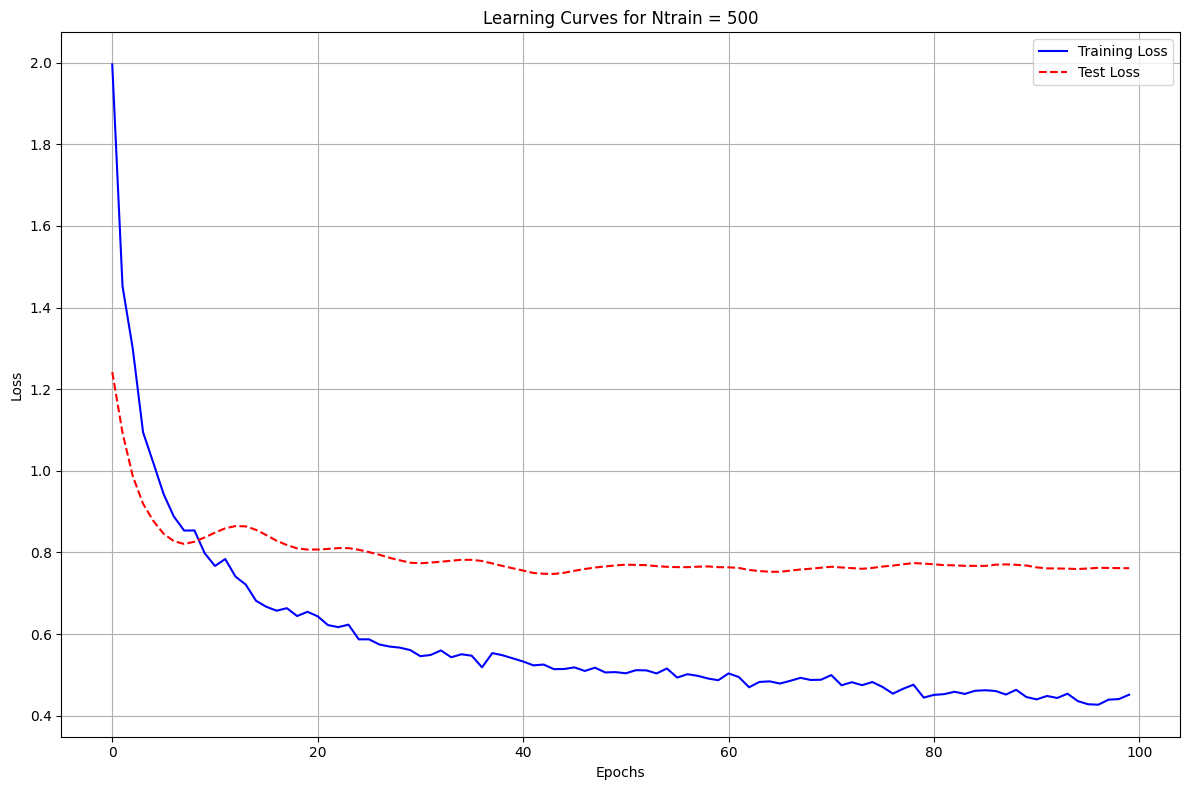

In [ ]:
underfitting_graph(500, feature_count=2, dropout_p=0.7)

## Subtask 1L
Explain how increasing the dropout probability affects overfitting. Describe any other effects you observe as a consequence of using dropout, and suggest reasons as to why they occur.

In general, dropout is an effective way to reduce overfitting. It works by randomly turning off some neurons during training, as already explained in the previous subtask.

However, in my case, the effect of dropout really depended on how much was used. When I set the dropout probability to 0.1, the model trained well and the test loss stayed close to the training loss However the test lost was better then the training loss indicating an underfit which is very uncommon in dropout model. But as I increased the dropout to 0.5, 0.6, and 0.7, the test loss started to rise and the gap between training and test loss became larger. This shows that the model began to adapt and giving a reasonable gap which how it supposed to be eventhough there's a lot of 'spikes' in the learning curve. I also noticed the training curves became much noisier. That is expected, since dropout adds randomness by switching neurons on and off during training, which can make learning less stable.

In the end, dropout helps reduce overfitting, but too much of it can actually hurt the model’s ability to learn. It is important to find a good balance to get the best results.